<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module_2_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
url="https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response=requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
data=StringIO(response.text)
data=pd.read_csv(data)
print("Number of data points= ",len(data))
data.head()

Number of data points=  205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
data.replace("?",np.nan,inplace=True)
data=data.dropna()
print(len(data))

159


In [6]:
x=data.drop("price",axis=1)
y=pd.to_numeric(data["price"])

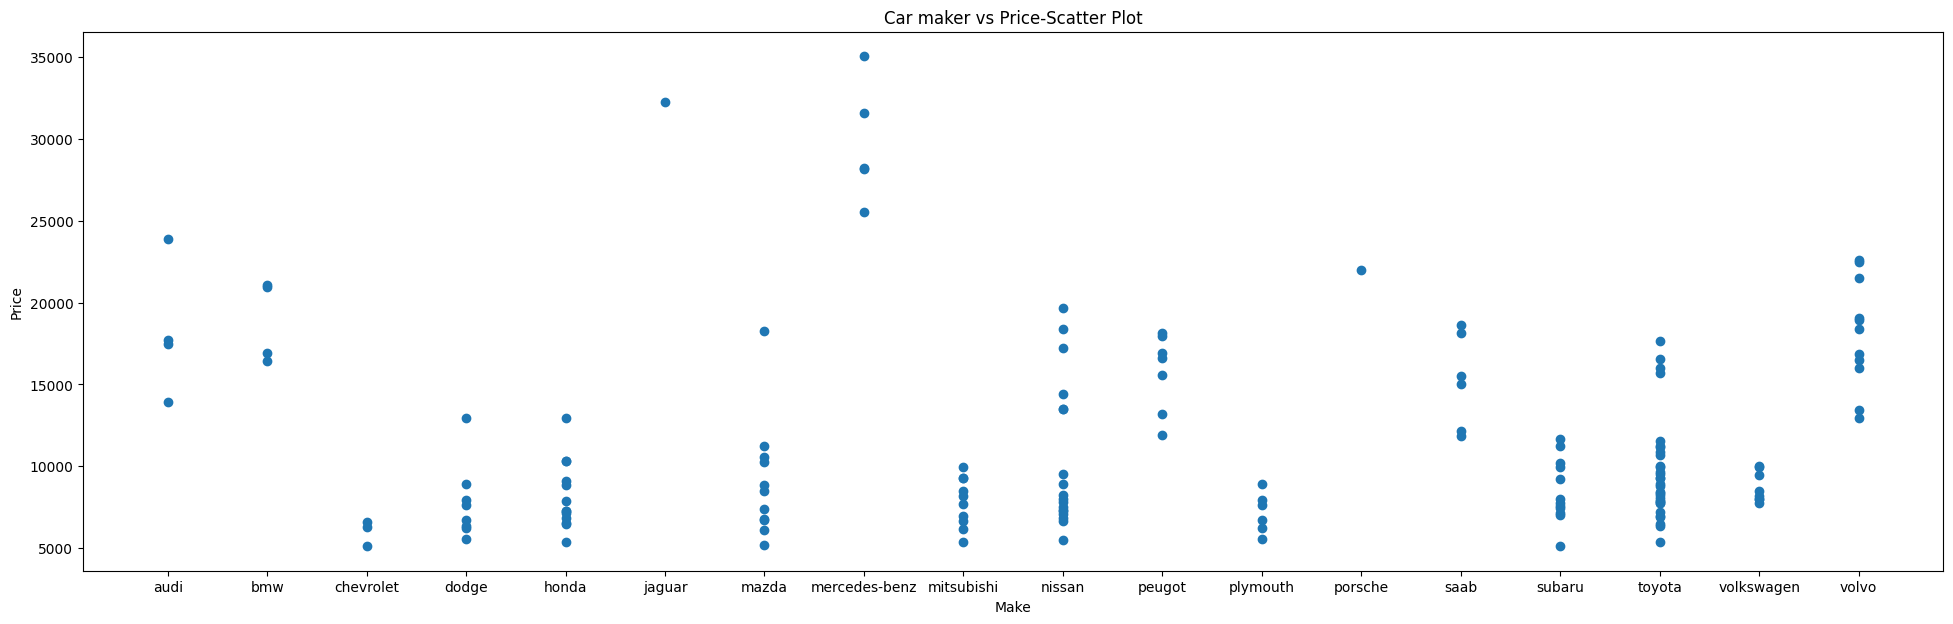

In [7]:
plt.figure(figsize=(24, 7))
plt.scatter(x["make"],y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price-Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

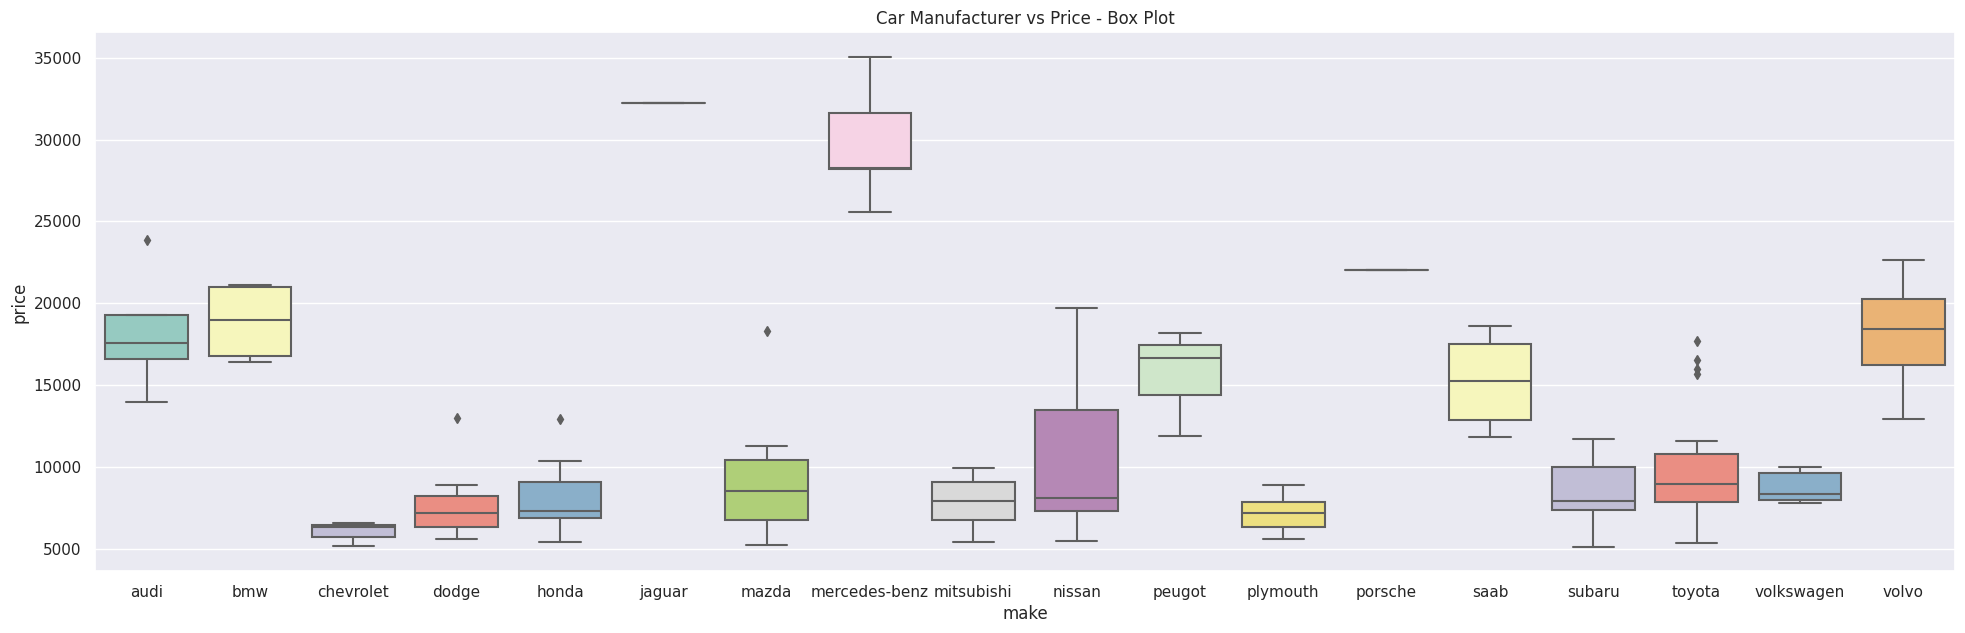

In [8]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=x["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

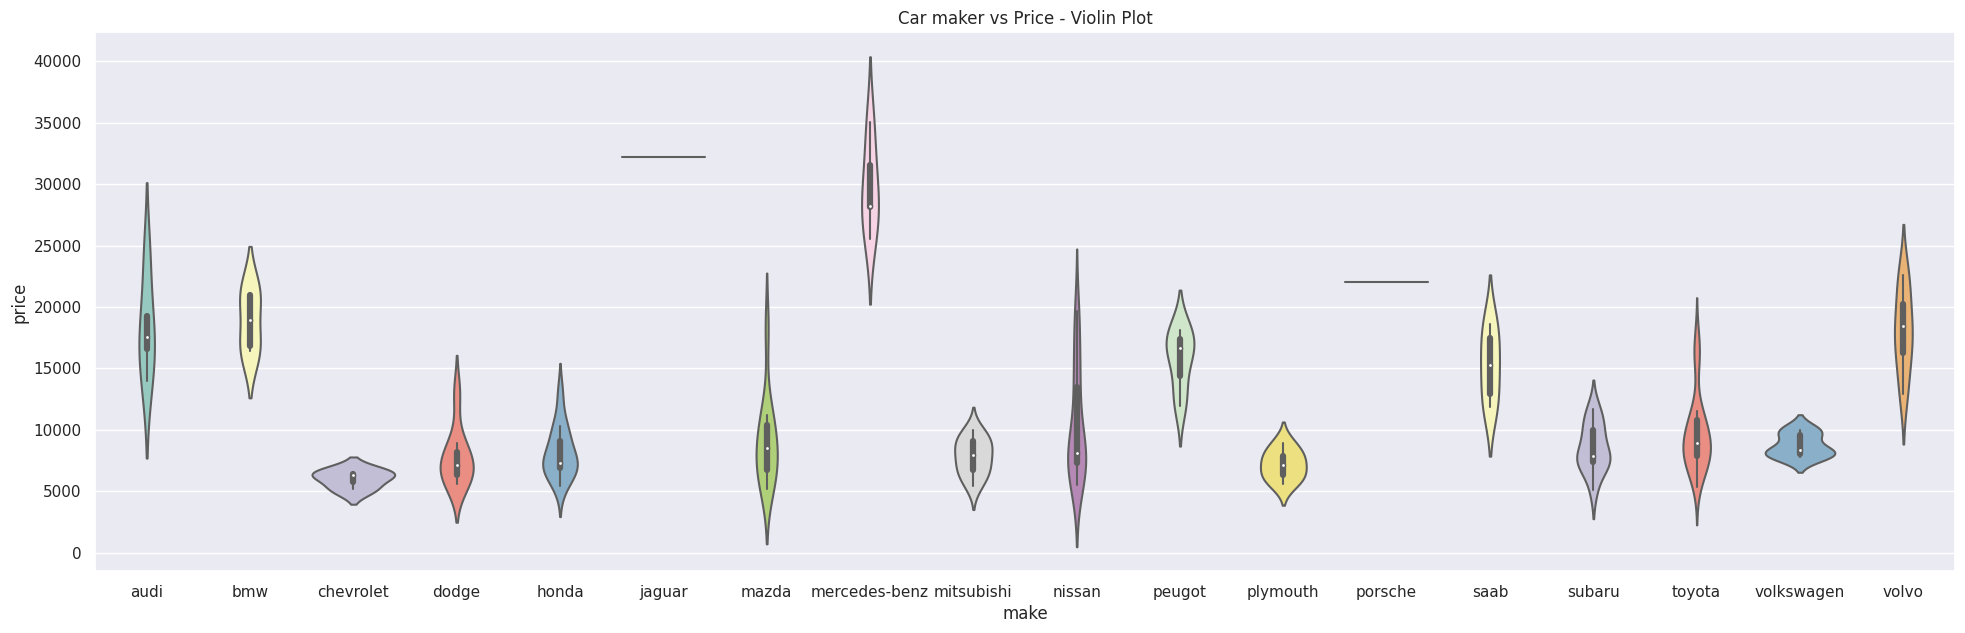

In [9]:
sns.violinplot(x=x["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

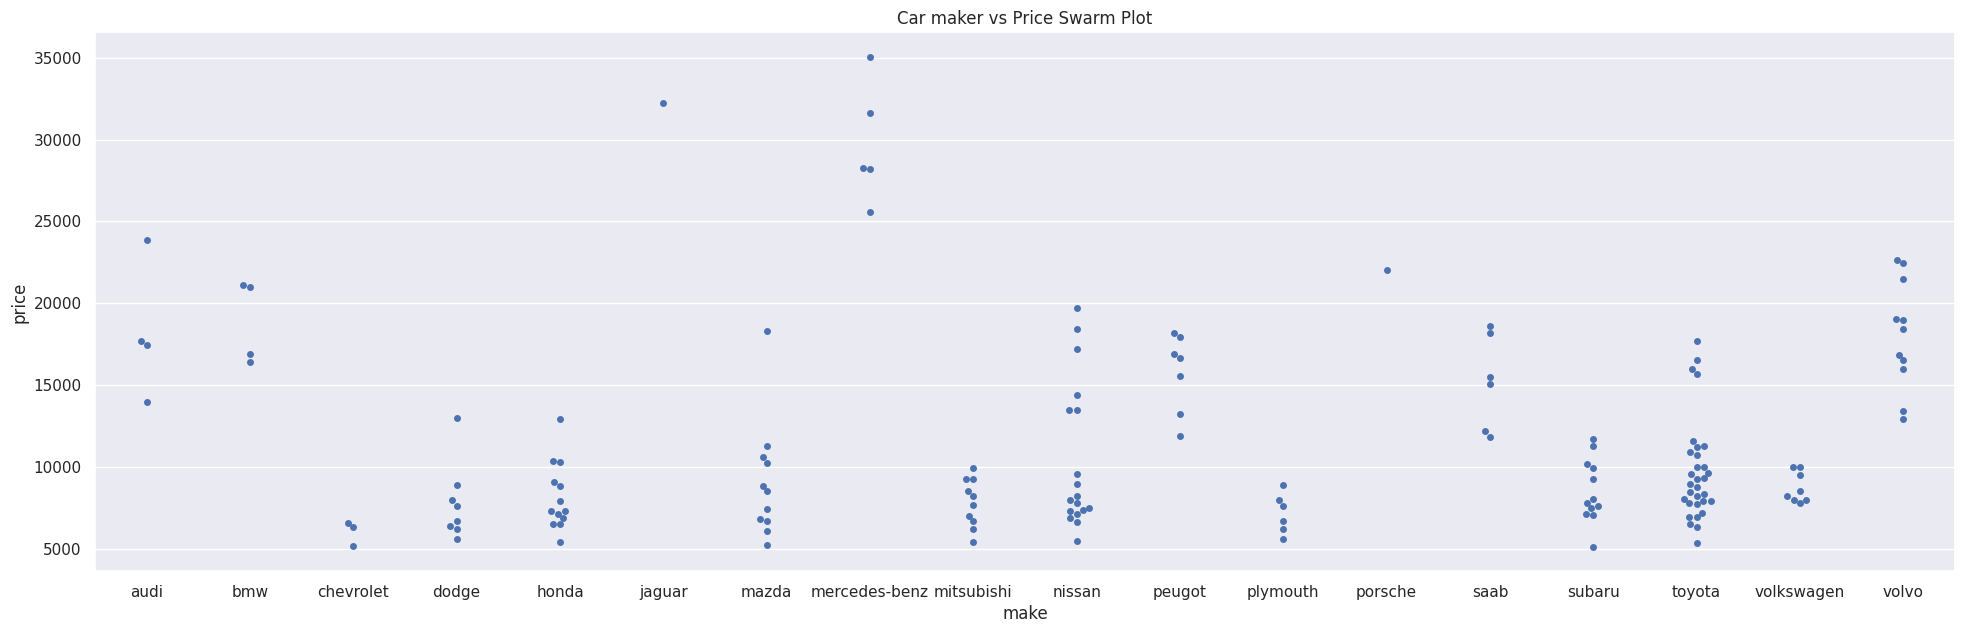

In [10]:
sns.swarmplot(x=x["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

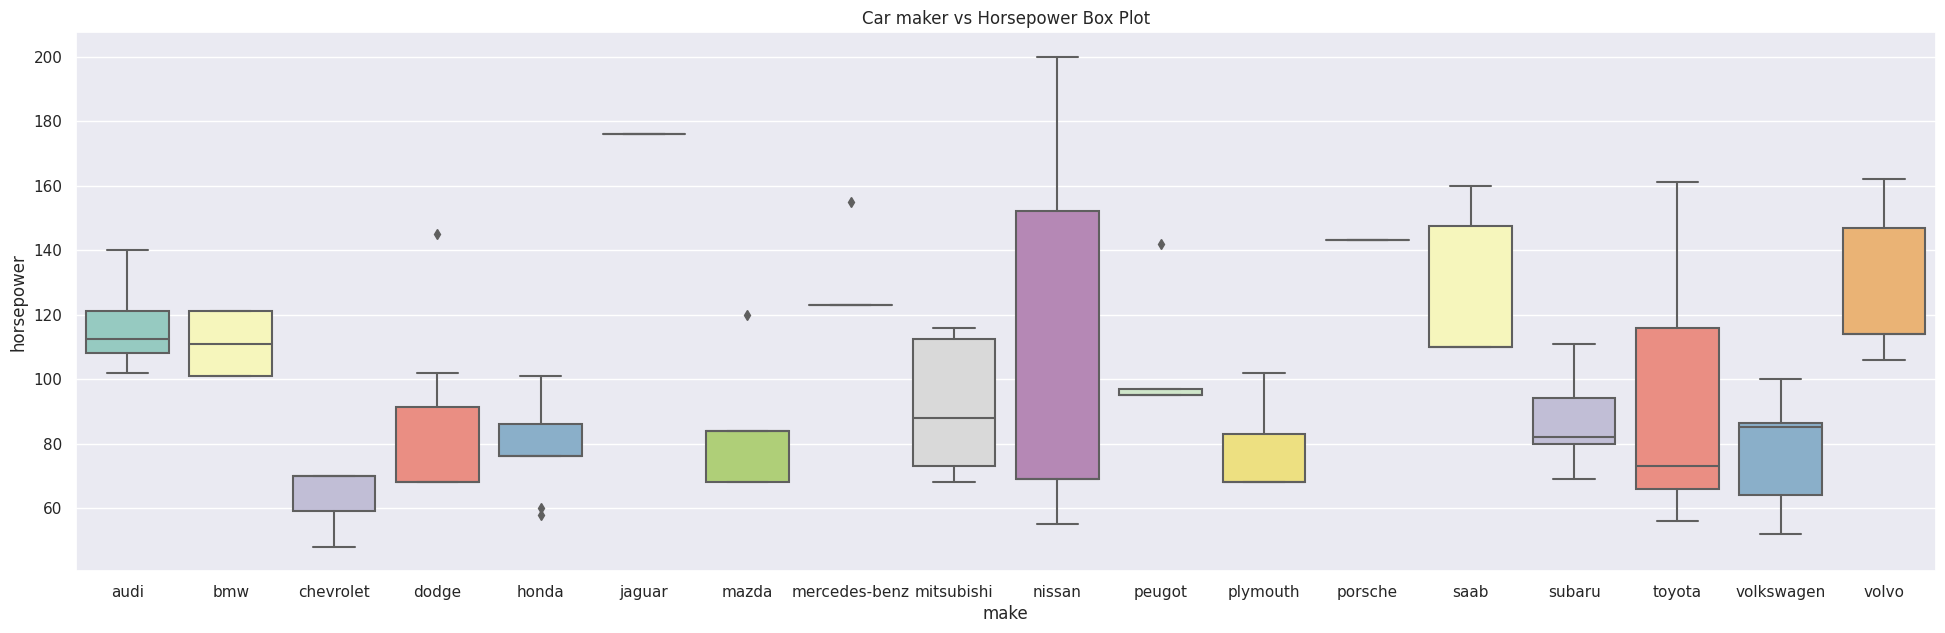

In [11]:
sns.boxplot(x=x["make"],y=pd.to_numeric(x["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

<Axes: xlabel='horsepower', ylabel='price'>

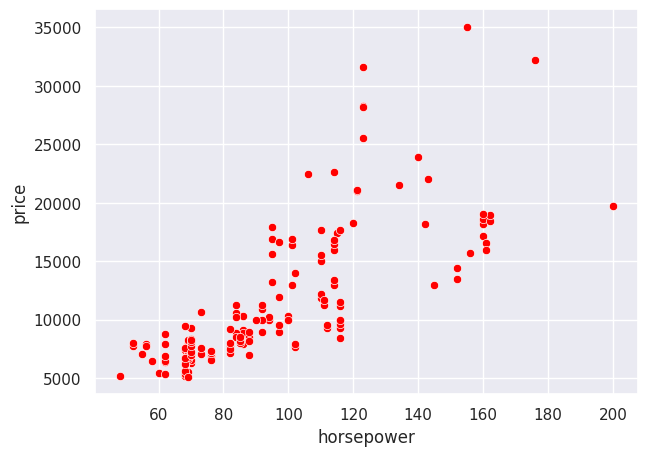

In [12]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(x["horsepower"]),y=y,color="red")

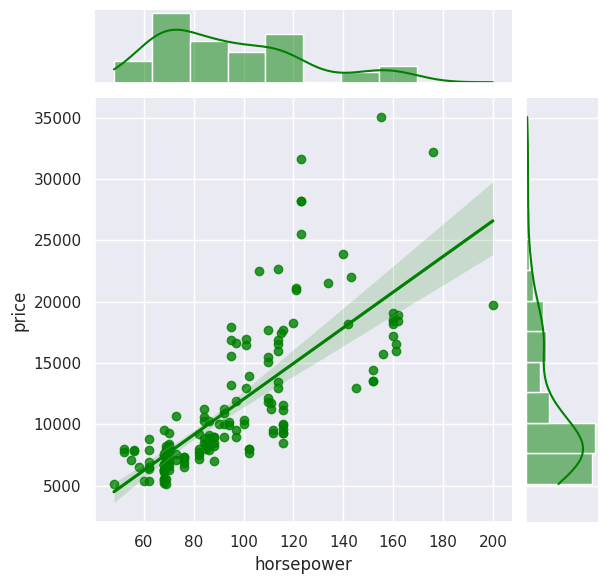

In [13]:
sns.jointplot(x=pd.to_numeric(x["horsepower"]),y=y,kind="reg",color='green')

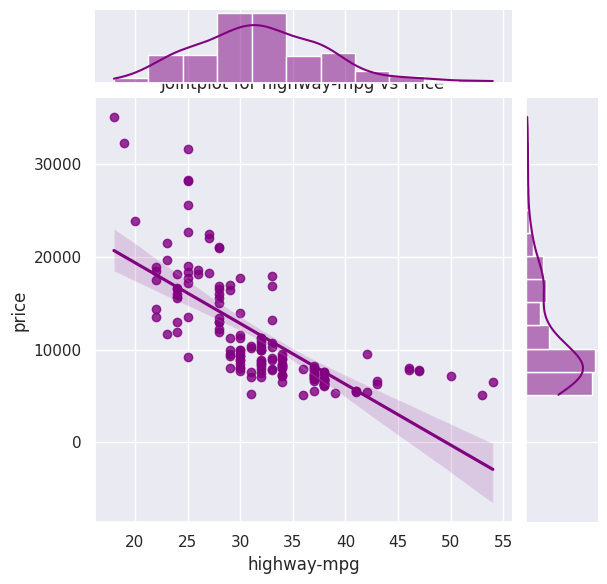

In [14]:
#Define the feature
feature="highway-mpg"

#Create a jointplot for the selected feature
sns.jointplot(x=pd.to_numeric(x[feature]),y=y,kind="reg",color='purple')
plt.title(f'Jointplot for {feature} vs Price')
plt.show()

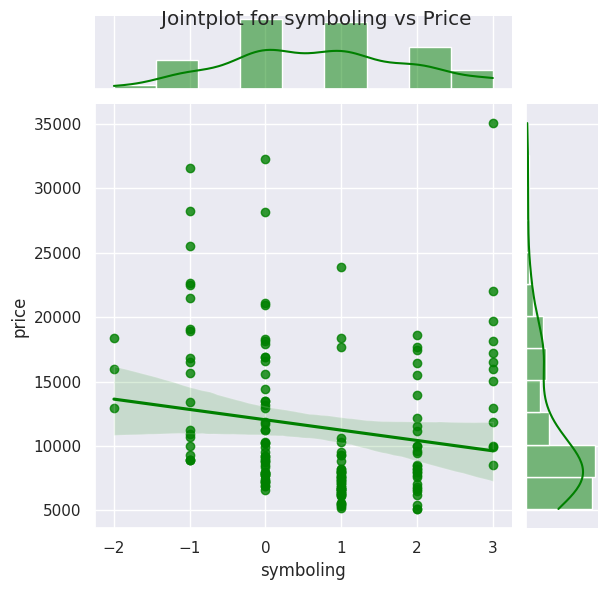

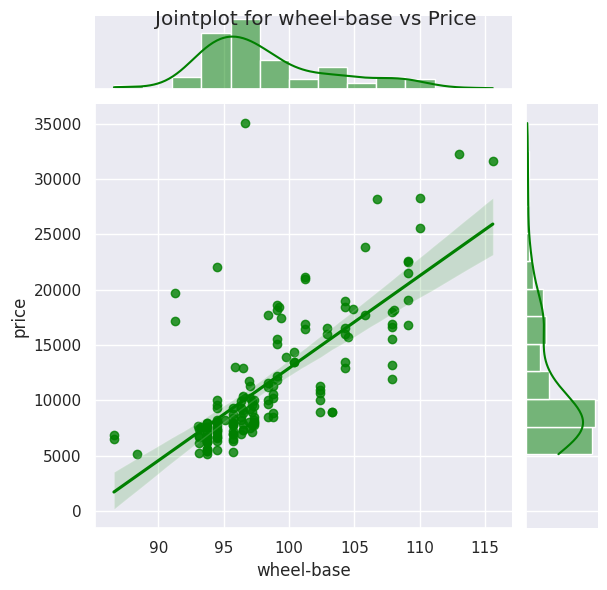

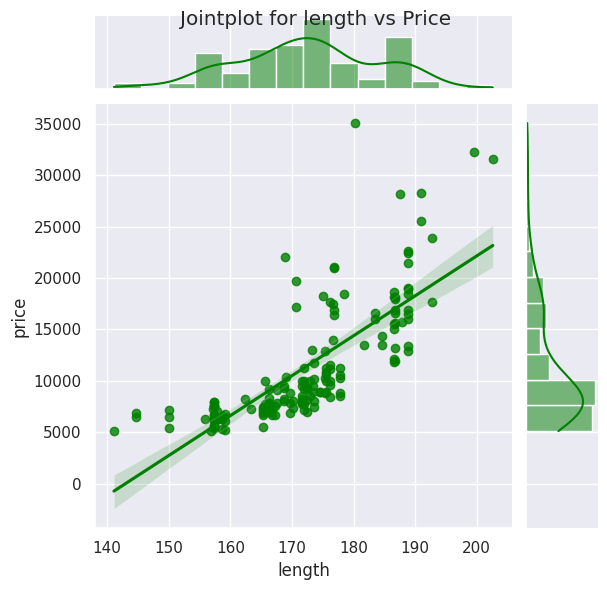

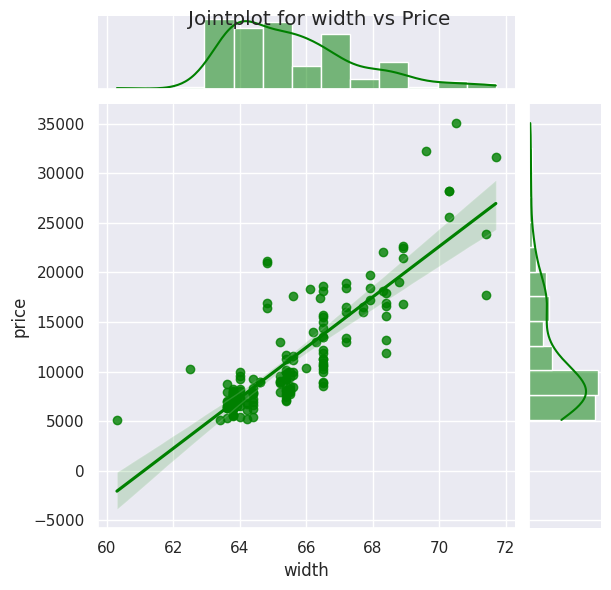

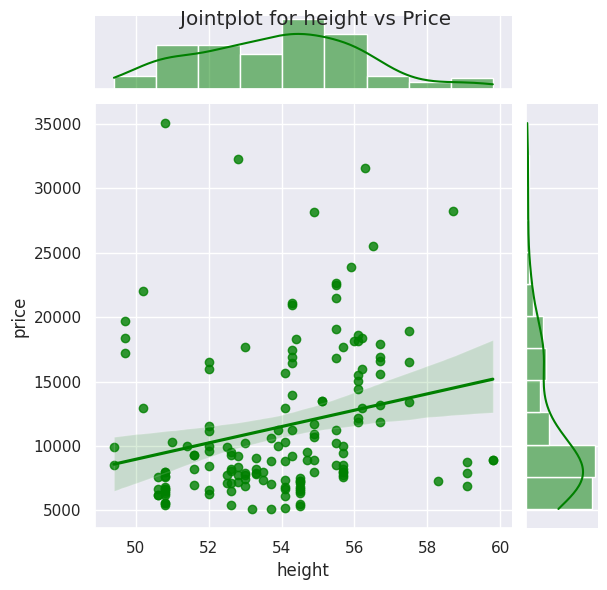

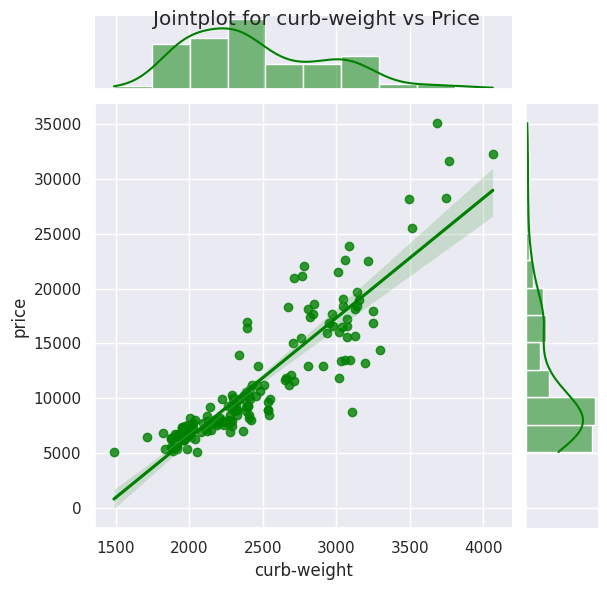

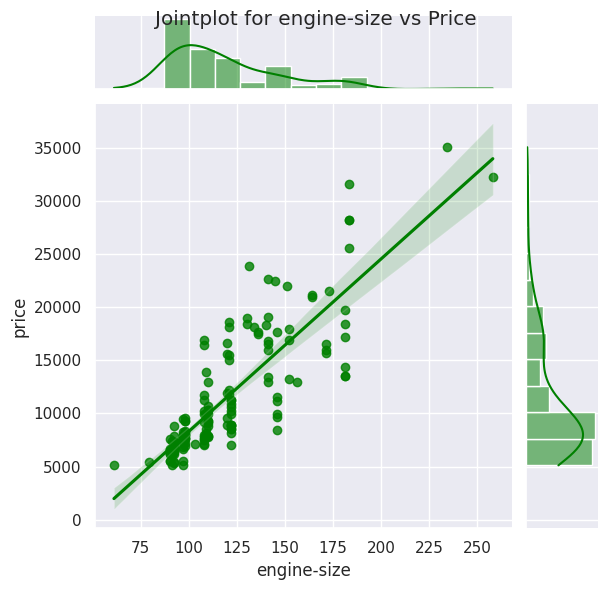

UFuncTypeError: ignored

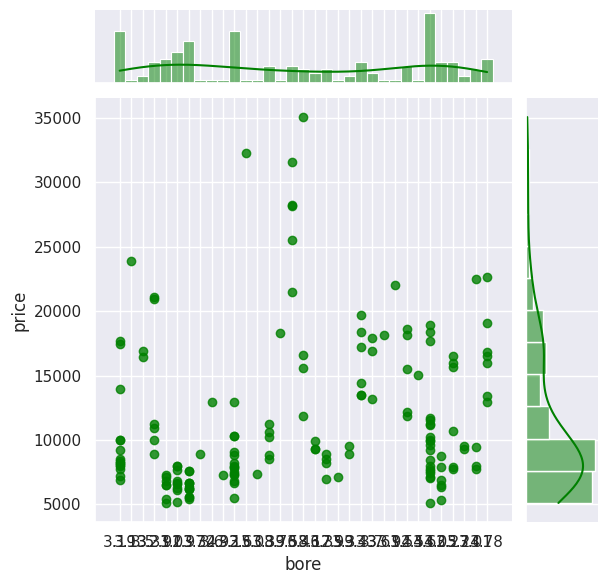

In [16]:
# List of numeric features
feature1 = "highway-mpg"
numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                   'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
# Iterate through the numeric features and create jointplots
for feature in numeric_features:
    sns.jointplot(x=x[feature], y=y, kind="reg", color='green')
    plt.suptitle(f'Jointplot for {feature} vs Price')
    plt.show()

**Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?**

In [25]:
#Convert the 'price' column to numeric
data['price']=pd.to_numeric(data['price'],errors='coerce')

price=data.groupby('body-style')['price'].agg(['max', 'min'])

costliest_body_type=price['max'].idxmax()
max_price=price['max'].max()

cheapest_body_type=price['min'].idxmin()
min_price=price['min'].min()

print("Body-Type with the Maximum Price:")
print(f"{costliest_body_type} (Max Price: ${max_price:.2f})")

print("\nBody-Type with the Minimum Price:")
print(f"{cheapest_body_type} (Min Price: ${min_price:.2f})")

Body-Type with the Maximum Price:
convertible (Max Price: $35056.00)

Body-Type with the Minimum Price:
hatchback (Min Price: $5118.00)


**Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?**

**Ans:**
The maximum/minimum figures may not provide a clear indication of which body type is the most expensive. While the maximum price may represent the most expensive vehicle within a body type, it may not always represent the overall range of costs within that category. We can consider the interquartile range (IQR) to acquire a more comprehensive grasp of costliness and price variance.


Taking the IQR into account allows us to comprehend the price spread within each body type. A bigger IQR indicates a wider price range and higher variability, whereas a smaller IQR indicates greater price constancy. As a result, even if a body-type has a high maximum price, it may not be the most expensive if it has a relatively modest IQR, indicating that most vehicles in that category are priced similarly.


In conclusion, both maximum/minimum values and the IQR are significant in determining the most expensive body type. While the highest price identifies the most costly car, the IQR reveals the price distribution and the degree of variance within each body type. When both aspects are considered, the interpretation improves since they provide a more complete picture of costliness.

**Do you think the body-style of a car can be a good predictor for its price?**

**Ans:**
As per the below performed steps, we cannot exactly tell that body-style of a car can be a good predictor for its price. But it can be used in some cases.

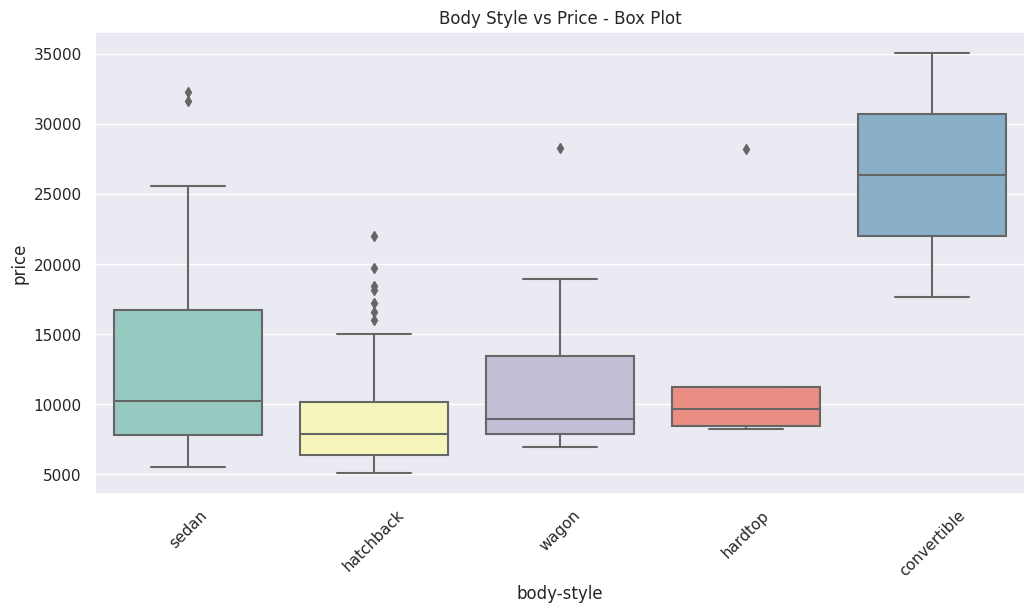

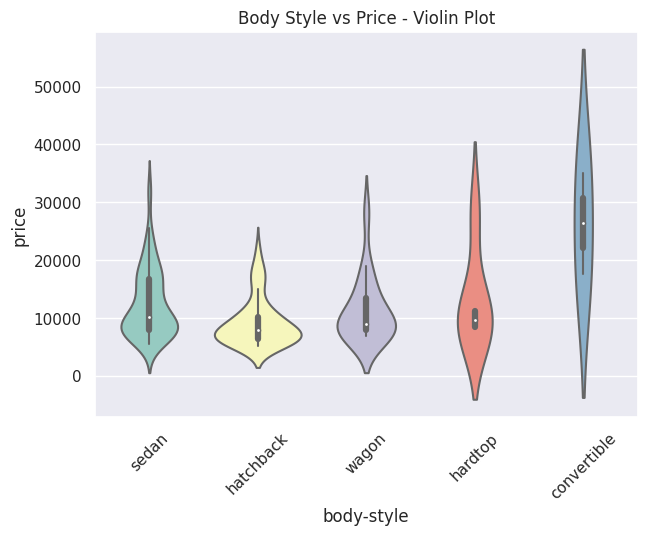

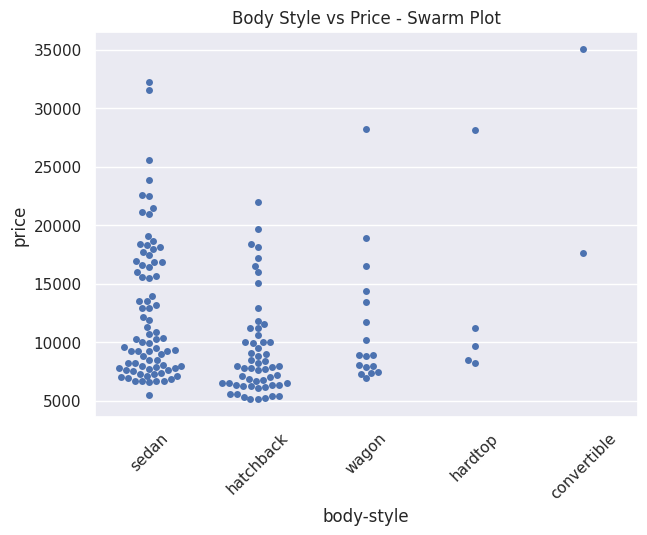

In [29]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
car_data = data[['body-style', 'price']]
plt.figure(figsize=(12, 6))
sns.boxplot(x='body-style', y='price', data=car_data, palette="Set3")
plt.title('Body Style vs Price - Box Plot')
plt.xticks(rotation=45)
plt.show()

sns.violinplot(x='body-style', y='price', data=car_data, palette="Set3")
plt.title('Body Style vs Price - Violin Plot')
plt.xticks(rotation=45)
plt.show()

sns.swarmplot(x='body-style', y='price', data=car_data)
plt.title('Body Style vs Price - Swarm Plot')
plt.xticks(rotation=45)
plt.show()